In [ ]:
# COUNTY LEVEL CORRELATION ANALYSIS FOR SOCIO ECONOMIC FACTORS ASSOCIATED WITH CORONAVIRUS CASES.

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%pwd
%cd D:\CPT_S_575\Project\Dataset

D:\CPT_S_575\Project\Dataset


In [28]:
os.chdir("D:\CPT_S_575\Project\Dataset")

In [32]:
df_counties= pd.read_csv(r"D:\CPT_S_575\Project\Dataset\counties.csv")
df_cases=pd.read_csv(r"D:\CPT_S_575\Project\Dataset\cases.csv")

In [33]:
df_merge= pd.merge(df_counties, df_cases, on="FIPS")

In [34]:
df_merge.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2013,Economic_typology_2015,POP_ESTIMATE_2018,N_POP_CHG_2018,Births_2018,Deaths_2018,...,ROBBERY,Number of AGGRAVATED ASSAULTS,BURGLRY,LARCENY,MOTOR VEHICLE THEFTS,ARSON,COUNTY,STATE,CASES,DEATHS
0,1001,AL,Autauga County,2.0,2.0,0.0,55601,158.0,655.0,532.0,...,34.0,87.0,447.0,1233.0,85.0,108.0,Autauga,Alabama,10545,157.0
1,1003,AL,Baldwin County,3.0,2.0,5.0,218022,5403.0,2254.0,2228.0,...,76.0,332.0,967.0,3829.0,192.0,31.0,Baldwin,Alabama,38171,589.0
2,1005,AL,Barbour County,6.0,6.0,3.0,24881,-277.0,261.0,324.0,...,8.0,36.0,90.0,362.0,21.0,0.0,Barbour,Alabama,3701,80.0
3,1007,AL,Bibb County,1.0,1.0,0.0,22400,-155.0,250.0,256.0,...,8.0,36.0,122.0,251.0,27.0,0.0,Bibb,Alabama,4354,95.0
4,1009,AL,Blount County,1.0,1.0,0.0,57840,13.0,681.0,662.0,...,9.0,101.0,397.0,865.0,86.0,9.0,Blount,Alabama,10765,193.0


In [76]:
df_merge.to_csv("c.csv")

In [4]:
df_corr= pd.read_csv(r"D:\CPT_S_575\Project\Dataset\county_corr.csv")

In [8]:
df_corr.tail()

,FIPS,STATE,COUNTY,POP_ESTIMATE,Less than a high school diploma,Employed,Unemployed,Median_Household_Income,Jan Temp AVG / F,Feb Temp AVG / F,...,Family Medicine/General Practice (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Family Medicine/General Practice Primary Care (2019),Total Primary Care Physicians (2019),Emergency Medicine specialists (2019),ICU Beds,COVID_CASES,COVID_DEATHS
34,53069,Washington,Wahkiakum,4426,282,1231,86,55692,42.5,36.1,...,2.164370,1.783770,1.120656,0.054036,2.594308,6.413232,0.678972,0,305,5
35,53071,Washington,Walla Walla,60922,4807,27887,1383,57329,36.7,26.7,...,29.791634,24.552834,15.425356,0.743780,35.709538,88.275401,9.345761,28,9424,112
36,53073,Washington,Whatcom,225685,11004,106375,5295,62262,34.8,25.8,...,110.362840,90.955752,57.143093,2.755327,132.285662,327.015428,34.621287,24,18539,178
37,53075,Washington,Whitman,49791,1133,22660,1025,45389,33.9,24.7,...,24.348433,20.066809,12.607004,0.607885,29.185083,72.146687,7.638206,6,6140,82
38,53077,Washington,Yakima,251446,40492,120986,8190,51377,33.3,24.8,...,122.960297,101.337971,63.665739,3.069836,147.385518,364.342873,38.573162,52,47053,635


In [15]:
# Drop FIPS because it only specifies the county's unique code and not used for quantitative analysis.
df_corr= df_corr.drop("FIPS", 1) 

C:\Users\shiva\AppData\Local\Temp/ipykernel_10776/2767689383.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_corr= df_corr.drop("FIPS", 1)


In [129]:
# Correaltion Analaysis for counties in Washington State

corr_list=[]
corr_list=df_corr.corr()['COVID_CASES']
corr_list.to_csv("corrlist.csv")

In [130]:
df_corr.corr()

,FIPS,POP_ESTIMATE,Less than a high school diploma,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Jan Temp AVG / F,Feb Temp AVG / F,Mar Temp AVG / F,...,Family Medicine/General Practice (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Family Medicine/General Practice Primary Care (2019),Total Primary Care Physicians (2019),Emergency Medicine specialists (2019),ICU Beds,COVID_CASES,COVID_DEATHS
FIPS,1.000000,0.079197,0.099632,0.069017,0.101519,-0.104592,0.052772,0.038611,0.034617,0.025549,...,0.079197,0.079197,0.079197,0.079197,0.079197,0.079197,0.079197,0.068408,0.114596,0.117527
POP_ESTIMATE,0.079197,1.000000,0.966698,0.997348,0.993355,-0.380014,0.751301,0.201462,0.161945,0.232757,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977097,0.967458,0.955721
Less than a high school diploma,0.099632,0.966698,1.000000,0.962511,0.976035,-0.334223,0.696709,0.153138,0.115467,0.172819,...,0.966698,0.966698,0.966698,0.966698,0.966698,0.966698,0.966698,0.943770,0.968124,0.954551
Employed,0.069017,0.997348,0.962511,1.000000,0.983921,-0.376940,0.735963,0.185594,0.146619,0.215211,...,0.997348,0.997348,0.997348,0.997348,0.997348,0.997348,0.997348,0.975025,0.952929,0.943544
Unemployed,0.101519,0.993355,0.976035,0.983921,1.000000,-0.370058,0.745457,0.192597,0.153787,0.222727,...,0.993355,0.993355,0.993355,0.993355,0.993355,0.993355,0.993355,0.976082,0.986310,0.972635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Primary Care Physicians (2019),0.079197,1.000000,0.966698,0.997348,0.993355,-0.380014,0.751301,0.201462,0.161945,0.232757,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977097,0.967458,0.955721
Emergency Medicine specialists (2019),0.079197,1.000000,0.966698,0.997348,0.993355,-0.380014,0.751301,0.201462,0.161945,0.232757,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.977097,0.967458,0.955721
ICU Beds,0.068408,0.977097,0.943770,0.975025,0.976082,-0.349322,0.684076,0.181043,0.146800,0.199612,...,0.977097,0.977097,0.977097,0.977097,0.977097,0.977097,0.977097,1.000000,0.952841,0.945448
COVID_CASES,0.114596,0.967458,0.968124,0.952929,0.986310,-0.357478,0.709191,0.139073,0.096953,0.158637,...,0.967458,0.967458,0.967458,0.967458,0.967458,0.967458,0.967458,0.952841,1.000000,0.991442


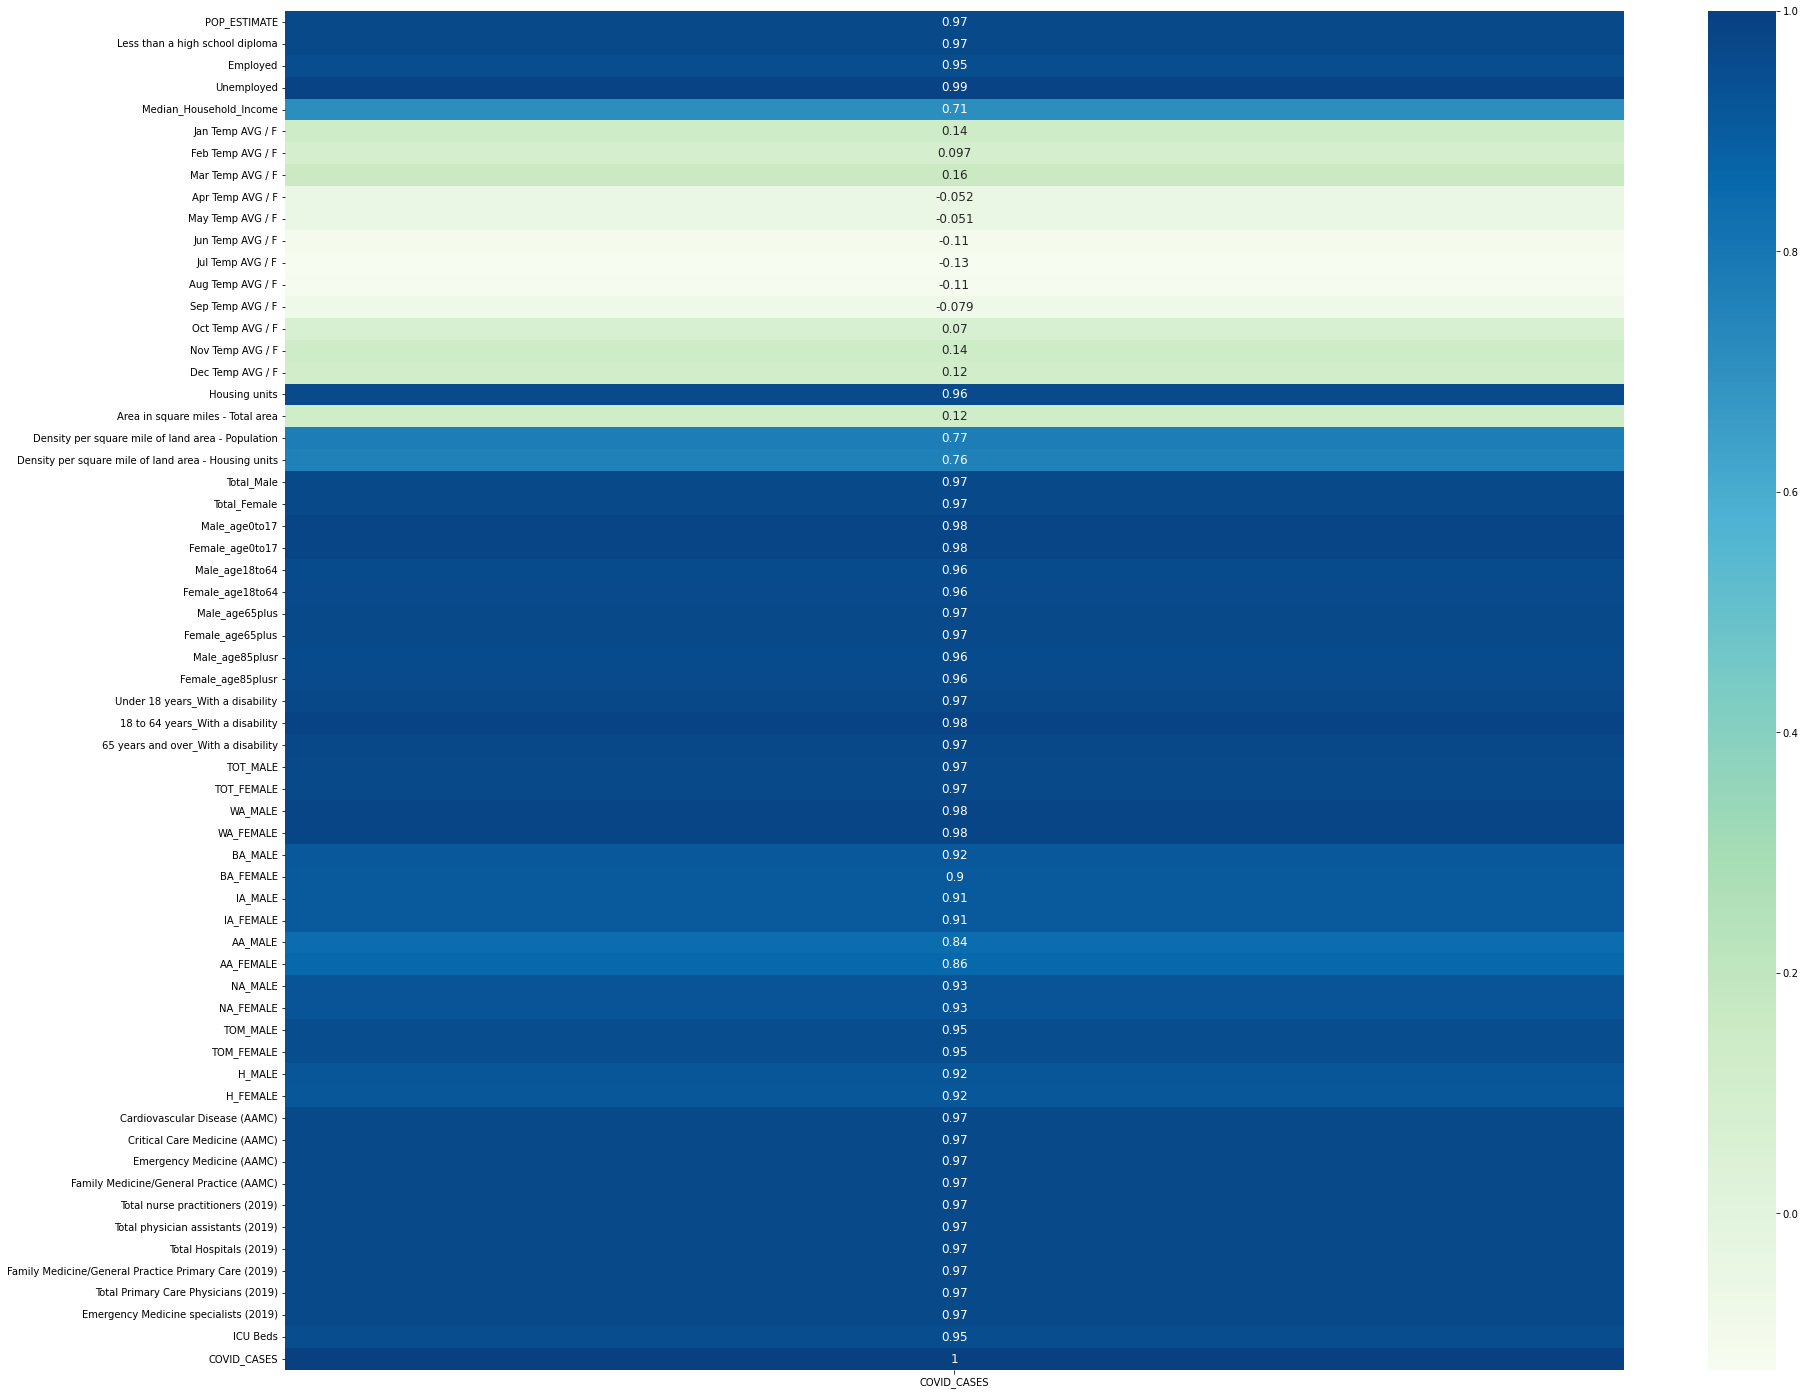

In [14]:
df_corr_trial = df_corr[df_corr.columns[3:84]].corr()['COVID_CASES'][:-1]
#df_corr_trial = df_corr.corr()
#set fig size
fig, ax = plt.subplots(figsize=(30,25))
#plot matrix
sns.heatmap(df_corr_trial.to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show();

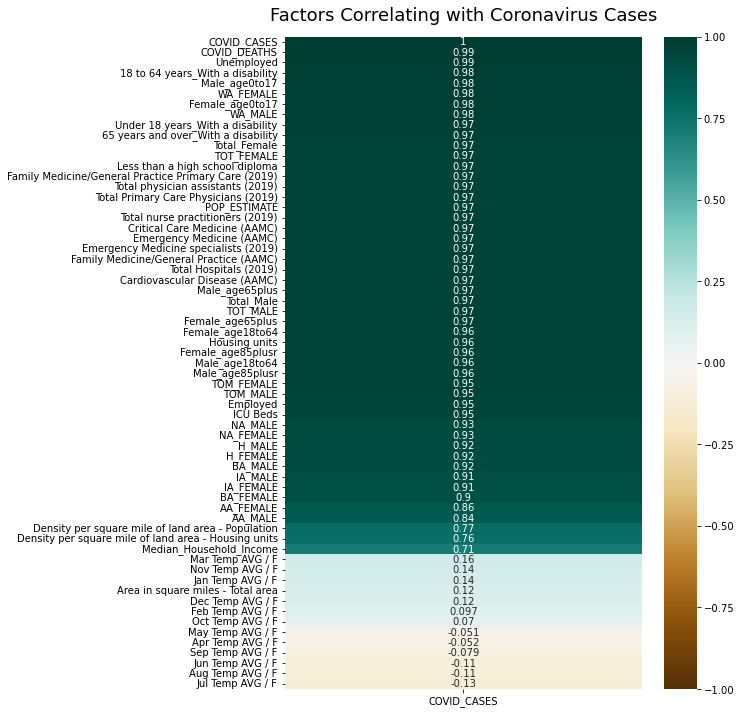

In [18]:
#Correltion Matrix to investigate how socio-economic factors correlate with Covid cases.

df_corr.corr()[['COVID_CASES']].sort_values(by='COVID_CASES', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_corr.corr()[['COVID_CASES']].sort_values(by='COVID_CASES', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Factors Correlating with Coronavirus Cases', fontdict={'fontsize':18}, pad=16);

In [135]:
df_corr.columns[df_corr.isnull().any()]

Index(['Under 18 years_With a disability', '18 to 64 years_With a disability',
       '65 years and over_With a disability'],
      dtype='object')

In [137]:
# Handle missing values with mean.
df_corr['Under 18 years_With a disability'] = df_corr['Under 18 years_With a disability'].fillna(df_corr['Under 18 years_With a disability']. mean())

df_corr['18 to 64 years_With a disability'] = df_corr['18 to 64 years_With a disability'].fillna(df_corr['18 to 64 years_With a disability']. mean())

df_corr['65 years and over_With a disability'] = df_corr['65 years and over_With a disability'].fillna(df_corr['65 years and over_With a disability']. mean())


In [138]:
df_corr.to_csv("county_corr_new.csv")

In [143]:
df_corr.head(20)

,FIPS,STATE,COUNTY,POP_ESTIMATE,Less than a high school diploma,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Jan Temp AVG / F,...,Family Medicine/General Practice (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Family Medicine/General Practice Primary Care (2019),Total Primary Care Physicians (2019),Emergency Medicine specialists (2019),ICU Beds,COVID_CASES,COVID_DEATHS
0,53001,Washington,Adams,19759,3778,8968,511,5.4,52012,32.9,...,9.662403,7.963288,5.002948,0.241232,11.581773,28.630604,3.031136,0,3365,34
1,53003,Washington,Asotin,22610,1615,9711,442,4.4,49776,34.1,...,11.056578,9.112301,5.724817,0.276039,13.252892,32.761676,3.468495,0,3051,51
2,53005,Washington,Benton,201877,12365,93924,5160,5.2,69212,35.3,...,98.720425,81.360632,51.114945,2.464662,118.330561,292.517861,30.969013,44,32412,391
3,53007,Washington,Chelan,77036,8575,43517,2063,4.5,57243,29.7,...,37.671585,31.047111,19.505396,0.940512,45.154788,111.624435,11.817735,20,12503,121
4,53009,Washington,Clallam,76737,4112,26240,1790,6.4,57183,41.0,...,37.525371,30.926608,19.429690,0.936861,44.979528,111.191186,11.771867,19,5321,74
5,53011,Washington,Clark,481857,23932,219230,11123,4.8,73971,41.4,...,235.634212,194.198399,122.005448,5.882862,282.441333,698.206230,73.919443,90,45582,551
6,53013,Washington,Columbia,4059,245,1689,100,5.6,53700,34.3,...,1.984903,1.635861,1.027733,0.049555,2.379190,5.881453,0.622672,0,393,9
7,53015,Washington,Cowlitz,108987,8381,43194,2729,5.9,58624,40.7,...,53.296031,43.924029,27.595340,1.330593,63.882923,157.921131,16.719189,18,14439,263
8,53017,Washington,Douglas,42907,4919,20452,1151,5.3,65912,29.7,...,20.982070,17.292414,10.863986,0.523840,25.150014,62.171837,6.582163,0,6729,47
9,53019,Washington,Ferry,7649,792,2196,292,11.7,40468,27.4,...,3.740458,3.082706,1.936715,0.093385,4.483475,11.083329,1.173398,0,871,17


In [146]:
# Dataset containing info about all counties of all fifty states in the United States

df_all_corr= pd.read_csv("corr_data_1.csv")

In [151]:
# Calculating correlations for all counties in Alabama
df_AL = df_all_corr[0:67]

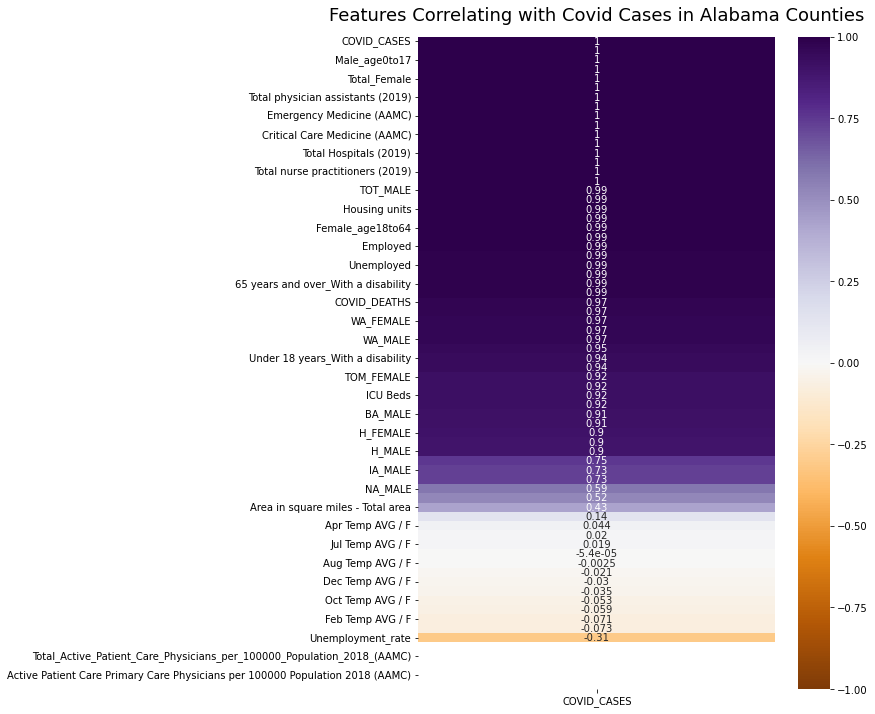

In [152]:
df_AL.corr()[['COVID_CASES']].sort_values(by='COVID_CASES', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_AL.corr()[['COVID_CASES']].sort_values(by='COVID_CASES', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Features Correlating with Covid Cases in Alabama Counties', fontdict={'fontsize':18}, pad=16);

In [167]:
# Returning a list of corelation values between socio economic factors and numbe of cummulative covid cases for all counties in Alabama
corr_list=[]
corr_list=df_AL.corr()['COVID_CASES']
corr_list= corr_list.to_csv("corr_AL.csv")

In [172]:
# Calculating correlations for all counties in Alaska

df_AK= df_all_corr[67:92]

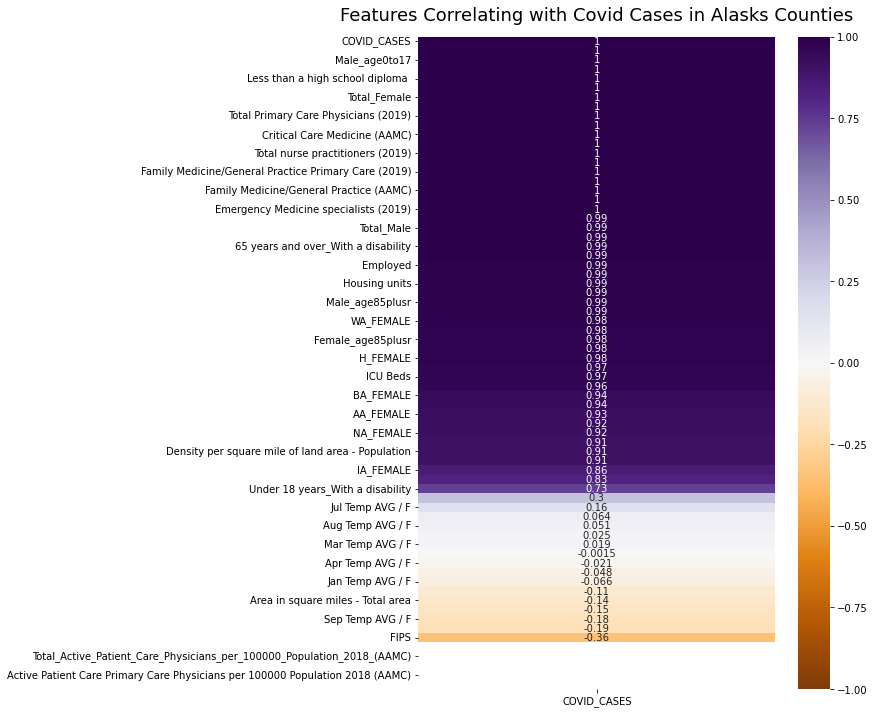

In [173]:
df_AK.corr()[['COVID_CASES']].sort_values(by='COVID_CASES', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_AK.corr()[['COVID_CASES']].sort_values(by='COVID_CASES', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Features Correlating with Covid Cases in Alasks Counties', fontdict={'fontsize':18}, pad=16);

In [176]:
corr_list=[]
corr_list=df_AK.corr()['COVID_CASES']
corr_list
# corr_list= corr_list.to_csv("corr_AK.csv")

FIPS                                    -0.355387
POP_ESTIMATE_2018                        0.995565
Less than a high school diploma          0.997425
Employed                                 0.991853
Unemployed                               0.997205
                                           ...   
Total Primary Care Physicians (2019)     0.995565
Emergency Medicine specialists (2019)    0.995565
ICU Beds                                 0.968809
COVID_CASES                              1.000000
COVID_DEATHS                             0.997544
Name: COVID_CASES, Length: 70, dtype: float64

In [181]:
#Arizona
df_all_corr[93:107]
df_AZ=df_all_corr[93:107]
corr_list=[]
corr_list= df_AZ.corr()['COVID_CASES']
corr_list.to_csv("corr_AZ.csv")

In [185]:
#Arkansas
df_all_corr[107:182]
df_AR=df_all_corr[107:182]
corr_list=[]
corr_list= df_AR.corr()['COVID_CASES']
corr_list.to_csv("corr_AR.csv")

In [188]:
#California
df_all_corr[182:240]
df_CA=df_all_corr[182:240]
corr_list=[]
corr_list= df_CA.corr()['COVID_CASES']
corr_list.to_csv("corr_CA.csv")

In [193]:
#Colorado
df_all_corr[240:304]
df_CO=df_all_corr[240:304]
corr_list=[]
corr_list= df_CO.corr()['COVID_CASES']
corr_list.to_csv("corr_CO.csv")

In [197]:
#Connecticut
df_all_corr[304:312]
df_CT=df_all_corr[304:312]
corr_list=[]
corr_list= df_CT.corr()['COVID_CASES']
corr_list.to_csv("corr_CT.csv")

In [314]:
df_all_corr[3110:3133]

,FIPS,STATE,COUNTY,POP_ESTIMATE_2018,Less than a high school diploma,Employed,Unemployed,Unemployment_rate,Median_Household_Income,Jan Temp AVG / F,...,Family Medicine/General Practice (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Family Medicine/General Practice Primary Care (2019),Total Primary Care Physicians (2019),Emergency Medicine specialists (2019),ICU Beds,COVID_CASES,COVID_DEATHS
3110,56001,Wyoming,Albany,38601,848,19639.0,668.0,3.3,47561.0,22.1,...,19.776985,19.108844,10.757076,1.937610,25.122116,41.959279,4.944246,4,6859,39
3111,56003,Wyoming,Big Horn,11881,808,5011.0,246.0,4.7,55195.0,23.2,...,6.087157,5.881510,3.310920,0.596377,7.732335,12.914645,1.521789,0,2150,56
3112,56005,Wyoming,Campbell,46140,2345,21883.0,938.0,4.1,78112.0,24.9,...,23.639545,22.840912,12.857996,2.316037,30.028612,50.154170,5.909886,14,9288,121
3113,56007,Wyoming,Carbon,14971,1039,7491.0,295.0,3.8,61773.0,21.5,...,7.670300,7.411168,4.172021,0.751482,9.743354,16.273474,1.917575,6,3157,44
3114,56009,Wyoming,Converse,13640,962,7276.0,278.0,3.7,68162.0,25.6,...,6.988370,6.752277,3.801107,0.684671,8.877119,14.826677,1.747093,0,2335,42
3115,56011,Wyoming,Crook,7450,348,3577.0,119.0,3.2,64053.0,24.3,...,3.816962,3.688010,2.076118,0.373959,4.848573,8.098148,0.954240,0,1000,21
3116,56013,Wyoming,Fremont,39531,2336,17880.0,985.0,5.2,51204.0,19.6,...,20.253465,19.569226,11.016243,1.984292,25.727374,42.970189,5.063366,12,9481,151
3117,56015,Wyoming,Goshen,13376,693,6604.0,226.0,3.3,51676.0,29.4,...,6.853111,6.621587,3.727537,0.671420,8.705304,14.539709,1.713278,0,2654,47
3118,56017,Wyoming,Hot Springs,4555,200,2126.0,82.0,3.7,49356.0,22.8,...,2.333726,2.254884,1.269358,0.228642,2.964463,4.951284,0.583432,0,890,10
3119,56019,Wyoming,Johnson,8460,271,4043.0,168.0,4.0,57676.0,26.2,...,4.334429,4.187996,2.357578,0.424657,5.505896,9.196018,1.083607,0,1364,16


In [315]:
#Delaware

#rewrote the code in this block for all state counties.

df_WY=df_all_corr[3110:3133]
corr_list=[]
corr_list= df_WY.corr()['COVID_CASES']
corr_list.to_csv("corr_WY.csv")